In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

In [2]:
np.random.seed(42)

In [3]:
df=pd.read_csv('df_PCA.csv',delimiter=',')
df.head()

,customer_id,PC0,PC1,PC2,PC3,PC4,PC5,customer_region_2440,customer_region_2490,customer_region_4140,customer_region_4660,customer_region_8370,customer_region_8550,customer_region_8670,customer_region_Unknown,last_promo_DISCOUNT,last_promo_FREEBIE,last_promo_no_promotion_used,payment_method_CASH,payment_method_DIGI
0,1b8f824d5e,0.136414,0.000248,0.591799,0.789285,0.054109,0.422382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5d272b9dcb,0.136332,0.000000,0.594984,0.801680,0.036851,0.205378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,f6d1b2ba63,0.214315,0.021475,0.301219,0.871834,0.354534,0.216267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,180c632ed8,0.141628,0.006605,0.597401,0.797470,0.174912,0.282334,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4eb37a6705,0.141919,0.006840,0.597255,0.787897,0.085252,0.446357,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
df.set_index('customer_id',inplace=True)

In [5]:
metric_features=df.columns

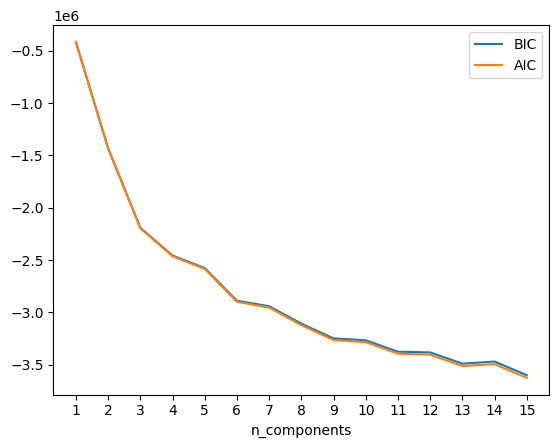

In [6]:
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=42).fit(df[metric_features])
          for n in n_components]

bic_values = [m.bic(df[metric_features]) for m in models]
aic_values = [m.aic(df[metric_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [8]:
gmm = GaussianMixture(n_components=7, covariance_type='full', n_init=10, init_params='kmeans', random_state=42)
gmm_labels = gmm.fit_predict(df[metric_features])

In [9]:
df_clean=pd.read_csv('df_clean.csv',delimiter=',')

In [10]:
df_clean.set_index('customer_id',inplace=True)

In [11]:
df_clean_numeric = df_clean.select_dtypes(include=['number'])
df_concat = pd.concat((df_clean_numeric, pd.Series(gmm_labels, name='labels', index=df_clean.index)), axis=1)
df_concat.groupby('labels').mean()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,order_count,Diversity_Cuisine,costumer_time,Intensity_of_Activity,Customer_loyalty,product_intensity,Day_Week_Spread,week_highest,hour_spread,hour_highest
labels,,,,,,,,,,,,,,,,,,,,,
0,27.163121,3.212766,5.323877,3.784870,26.919622,63.073286,1.768582,1.140071,2.141300,0.170733,...,4.304965,1.608454,36.153664,8.872300,0.855934,1.230536,0.795002,3.758865,0.348873,13.406619
1,27.385513,3.155798,5.592997,3.376991,27.228974,62.504076,2.942395,3.469555,1.642021,0.608257,...,4.416451,1.723407,35.275102,8.329764,0.838819,1.268001,0.750657,3.691738,0.426750,13.557429
2,27.461386,2.927590,6.001134,2.477398,27.287799,66.681168,7.596697,5.775412,0.000000,2.331990,...,4.822021,2.061610,39.393368,9.049017,0.759211,1.239044,0.821656,3.824430,0.462111,14.039394
3,27.555499,3.801608,7.051137,4.344963,24.154609,65.562340,2.695993,3.569155,2.488074,0.308529,...,5.400205,1.855679,41.407730,9.180554,0.821187,1.293173,0.931336,3.672311,0.555438,13.406020
4,27.406412,2.443024,3.847920,1.504116,34.500000,59.138432,4.577699,17.270847,4.144887,0.000000,...,2.850520,1.528559,24.638432,7.136977,0.926128,1.374447,0.433998,3.552860,0.188972,7.292894
5,27.550113,3.214221,5.530926,2.051693,27.983973,65.930700,5.990865,25.833318,5.238804,0.000000,...,3.979910,1.899719,37.946727,9.857377,0.878799,1.398815,0.621154,3.412641,0.306970,7.071332
6,27.534315,2.200862,3.842616,2.039526,36.062882,56.786561,3.879450,3.235929,0.604017,1.047068,...,3.086957,1.507491,20.723679,5.005606,0.877362,1.237543,0.519720,4.007546,0.248225,13.948617


In [13]:
df_concat.to_csv('df_GMM.csv')

In [ ]:
cluster_means = df_concat.groupby('labels').mean().T
cluster_means.style.format(precision=2).background_gradient(axis=1)

labels,0,1,2,3,4,5,6
customer_age,27.39,27.41,27.60,27.51,27.43,27.52,27.55
vendor_count,2.98,2.44,3.17,3.85,2.44,3.14,3.21
product_count,5.08,3.85,5.91,7.18,4.69,6.58,5.53
is_chain,3.29,1.50,3.22,4.44,1.97,2.70,2.05
first_order,29.21,34.50,27.28,23.80,32.91,25.00,27.98
last_order,59.96,59.14,64.42,65.88,62.30,68.36,65.93
CUI_American,1.94,4.58,4.01,2.82,6.36,8.21,5.99
CUI_Asian,2.70,17.27,4.06,3.65,4.74,6.22,25.83
CUI_Beverages,1.83,4.14,1.31,2.51,0.00,0.00,5.24
CUI_Cafe,0.19,0.00,1.13,0.31,2.01,2.51,0.00
